# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [4]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

## There were 81,937 rows. I read only the first 30,000.

In [5]:
data_types = df.dtypes
data_types

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

The dataset provides details of all dogs licensed in New York City, including animal name, breed, gender, colors, date of birth, etc. Each row is an individual dog licensed in New York City.

The column 'Animal Name' provides the name of the dog.
The column 'Animal Gender' mentions the gender of the dog.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

Questions:

1. Of all the pet dogs in the dataset, which was the most common breed among pet dogs in New York City?
2. Which were the five most popular names for pet dogs licensed in the period covered by the dataset?
3. As of this dataset, which borough of New York City had the maximum number of pet dog owners? How do the different boroughs compare against each other in terms of number of pet dog owners?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
num_breeds = df['Primary Breed'].value_counts()
num_breeds.head()

Primary Breed
Unknown              4777
Yorkshire Terrier    1882
Shih Tzu             1760
Chihuahua            1535
Maltese              1133
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [7]:
num_breeds = df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts()
num_breeds.head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## What are the most popular dog names?

In [8]:
num_names = df[df['Animal Name'] != 'UNKNOWN']['Animal Name'].value_counts()
num_names.head(10)

Animal Name
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [9]:
num_max = df[df['Animal Name'] == 'Max']['Animal Name'].value_counts()
num_maxwell = df[df['Animal Name'] == 'Maxwell']['Animal Name'].value_counts()

num_max, num_maxwell

(Animal Name
 Max    202
 Name: count, dtype: int64,
 Animal Name
 Maxwell    11
 Name: count, dtype: int64)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [10]:
guard_yes = (df['Guard or Trained'] == 'Yes').sum()
guard_yes

17

In [11]:
guard_percent = (guard_yes / 30000) * 100
f'The percentage of guard or trained dogs in the dataset is {guard_percent: .2f}%.'

'The percentage of guard or trained dogs in the dataset is  0.06%.'

## What are the actual numbers?

In [12]:
guard_yes

17

In [13]:
guard_no = (df['Guard or Trained'] == 'No').sum()
guard_no

19809

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [14]:
guard_check = (df['Guard or Trained'] == 'Yes').value_counts()
guard_check

Guard or Trained
False    29983
True        17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [15]:
df['Guard or Trained'] = df['Guard or Trained'].fillna("No")
guard_no = (df['Guard or Trained'] == 'No').sum()
guard_no

29983

## What are the top dog breeds for guard dogs? 

In [16]:
guard_dogs = df[df['Guard or Trained'] == 'Yes']
num_breeds_guard = guard_dogs[guard_dogs['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts()
num_breeds_guard

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [17]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [18]:
df['Age'] = 2023 - df['Year']
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,10
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,9
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,15
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,13
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,13
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,9
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,14


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [19]:
neighborhoods_df = pd.read_csv('zipcodes-neighborhoods.csv')
neighborhoods_df

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [20]:
merged = df.merge(neighborhoods_df, left_on='Owner Zip Code', right_on='zip')
merged

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,15,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,12,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,12,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,16,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,13,Jamaica,11436,Queens
29569,11436,ROXY,F,Unknown,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,No,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,20,Jamaica,11436,Queens
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,14,Jamaica,11436,Queens
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,19,Jamaica,11436,Queens


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [61]:
num_names_bronx = merged[(merged['borough'] == 'Bronx') & (merged['Animal Name'] != 'Unknown')]['Animal Name'].value_counts()
num_names_bronx.head()

Animal Name
Bella       22
Max         21
Rocky       20
Princess    15
Lucky       15
Name: count, dtype: int64

In [62]:
num_names_brooklyn = merged[(merged['borough'] == 'Brooklyn') & (merged['Animal Name'] != 'Unknown')]['Animal Name'].value_counts()
num_names_brooklyn.head()

Animal Name
Max        46
unknown    45
UNKNOWN    45
Bella      45
Charlie    42
Name: count, dtype: int64

In [63]:
num_names_ues = merged[(merged['neighborhood'] == 'Upper East Side') & (merged['Animal Name'] != 'Unknown')]['Animal Name'].value_counts()
num_names_ues.head()

Animal Name
Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [82]:
most_common_breeds = merged[merged['Primary Breed'] != 'Unknown'].groupby('neighborhood')['Primary Breed'].agg(lambda neighborhood: neighborhood.value_counts().idxmax())
most_common_breeds

neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## What breed of dogs are the least likely to be spayed? Male or female?

In [110]:
spayed_clean_df = df[df['Spayed or Neut'].isin(['Yes', 'No'])]

spayed_counts = spayed_clean_df.groupby('Primary Breed')['Spayed or Neut'].value_counts().unstack()

spayed_percentage = (spayed_counts['Yes'] / (spayed_counts['Yes'] + spayed_counts['No'])) * 100

spayed_percentage_sorted = spayed_percentage.sort_values()

spayed_percentage_sorted.head(5)

Primary Breed
Greater Swiss Mountain Dog    33.333333
Lagotto Romagnolo             33.333333
American Bully                35.294118
Morkie                        39.393939
Affenpinscher                 40.000000
dtype: float64

Therefore, among all the dogs which have 'spayed or neut' details mentioned in the dataset (either 'Yes' or 'No'), the Greater Swiss Mountain Dog andthe 
Lagotto Romagnol breeds are the least likely to be spayed. 

In [112]:
spayed_counts_gender = spayed_clean_df.groupby('Animal Gender')['Spayed or Neut'].value_counts().unstack()

spayed_percentage_gender = (spayed_counts_gender['Yes'] / (spayed_counts_gender['Yes'] + spayed_counts_gender['No'])) * 100

spayed_percentage_gender_sorted = spayed_percentage_gender.sort_values()

spayed_percentage_gender_sorted

Animal Gender
M    79.185632
F    85.784992
           NaN
dtype: float64

Therefore, among all the dogs which have 'spayed or neut' details mentioned in the dataset (either 'Yes' or 'No'), male dogs are less likely to be spayed (at 79.19%) compared to female dogs (at 85.78%).

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [114]:
df['Animal Dominant Color'] = df['Animal Dominant Color'].str.lower()
df['Animal Secondary Color'] = df['Animal Secondary Color'].str.lower()
df['Animal Third Color'] = df['Animal Third Color'].str.lower()

allowed_colors = ['black', 'white', 'grey']

df['monochrome'] = (
    (df['Animal Dominant Color'].isin(allowed_colors)) &
    (df['Animal Secondary Color'].isin(allowed_colors)) &
    (df['Animal Third Color'].isin(allowed_colors))
)

df[df['monochrome']]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,monochrome
39,10471,Elaine,F,Labrador Retriever,NaN,black,black,black,2005-04-01,Yes,No,Yes,2014-09-14 18:52:22.570,2014-09-14,2019-09-14,2005,18,True
136,10027,Coco Wilson,F,Maltese,NaN,white,white,white,2002-07-01,Yes,No,Yes,2014-09-20 10:09:46.703,2014-09-20,2016-09-20,2002,21,True
342,11355,remy,M,Bichon Frise,NaN,white,white,white,2011-07-01,Yes,No,Yes,2014-10-06 22:18:32.597,2014-10-06,2017-10-06,2011,12,True
1068,11206,Kevin Fetter,M,French Bulldog,NaN,black,black,white,2014-09-01,No,No,Yes,2014-12-01 17:26:29.567,2014-12-01,2016-12-01,2014,9,True
1131,11217,Guinness,M,Labrador Retriever,NaN,black,black,black,2014-07-01,Yes,No,Yes,2014-12-09 16:12:13.517,2014-12-09,2018-12-09,2014,9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28029,11412,Lincoln Abraham Julien,M,German Shepherd Dog,NaN,white,white,white,2015-05-01,No,No,No,2015-08-14 12:22:35.537,2015-08-14,2016-08-14,2015,8,True
28840,10465,Gigi,F,Shih Tzu,NaN,black,black,black,2012-11-01,No,No,Yes,2015-08-17 14:17:56.430,2015-08-17,2016-08-17,2012,11,True
28968,11374,Lola,F,Maltese,NaN,white,white,white,2011-09-01,Yes,No,Yes,2015-08-17 18:32:25.453,2015-08-17,2018-08-17,2011,12,True
28995,11103,Rupert,M,Labrador Retriever,NaN,black,black,black,2011-12-01,Yes,No,Yes,2015-08-17 22:47:30.457,2015-08-17,2016-08-17,2011,12,True


## How many dogs are in each borough? Plot it in a graph.

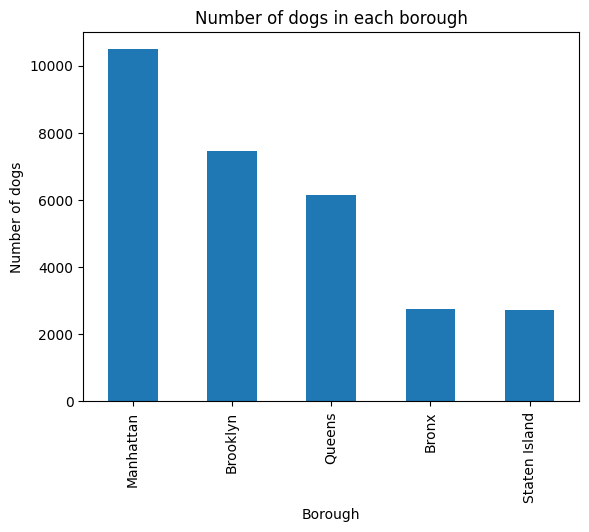

In [128]:
dogs_by_borough = merged['borough'].value_counts()
dogs_by_borough.plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Number of dogs')
plt.title('Number of dogs in each borough')
plt.show()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [131]:
population_df = pd.read_csv('boro_population.csv')
population_df

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [135]:
merged_pop = merged.merge(population_df, left_on='borough', right_on='borough')
merged_pop

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,15,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,12,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,12,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,16,Upper West Side,10024,Manhattan,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,...,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,13,Jamaica,11436,Queens,2339150,109
29569,11436,ROXY,F,Unknown,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,...,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,20,Jamaica,11436,Queens,2339150,109
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,...,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,14,Jamaica,11436,Queens,2339150,109
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,...,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,19,Jamaica,11436,Queens,2339150,109


In [136]:
data_types = merged_pop.dtypes
data_types

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
Year                               int64
Age                                int64
neighborhood                      object
zip                                int64
borough                           object
population                         int64
area_sqmi                          int64
dtype: object

In [140]:
dogs_by_borough = merged_pop['borough'].value_counts()

dogs_per_capita = dogs_by_borough / merged_pop.groupby('borough')['population'].first()

dogs_per_capita.sort_values(ascending=False)

borough
Manhattan        0.006371
Staten Island    0.005746
Brooklyn         0.002832
Queens           0.002631
Bronx            0.001888
dtype: float64

Therefore, out of the five boroughs of New York City, as per this dataset, Manhattan has the highest number of dogs per capita.

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [142]:
breeds_clean_df = merged[merged['Primary Breed'] != 'Unknown']
top_breeds = breeds_clean_df.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5)
top_breeds

borough        Primary Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

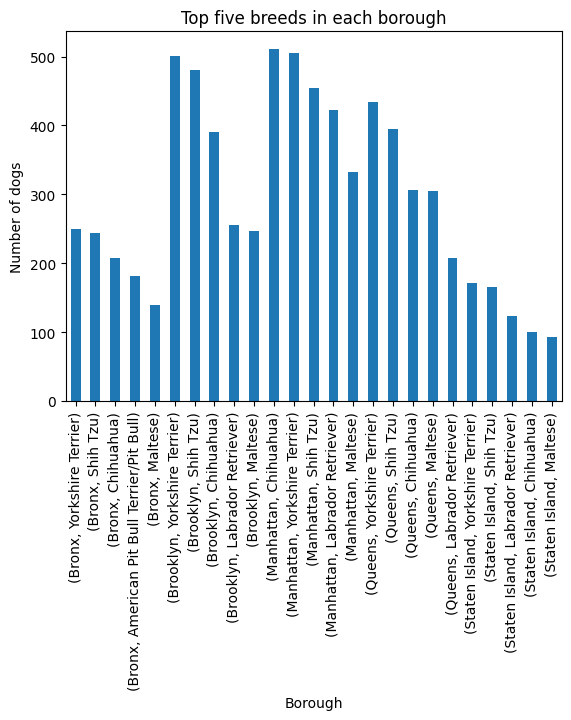

In [143]:
top_breeds.plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Number of dogs')
plt.title('Top five breeds in each borough')
plt.show()

## What percentage of dogs are not guard dogs?

In [148]:
guard_no = (df['Guard or Trained'] == 'No').sum()
guard_no_percent = (guard_no / len(df)) * 100
f'{guard_no_percent: .2f}% of dogs in this dataset are not guard dogs.'

' 99.94% of dogs in this dataset are not guard dogs.'